# Тестирование YOLOX

Загружаем необходимые библиотеки:

In [1]:
import os
import warnings

from abbyy_course_cvdl_t3.coco_text import COCO_Text
from eval import evaluate
from inference import infer

warnings.filterwarnings('ignore')

C:\Users\Aleksei\anaconda3\envs\data_science_3.9\lib\site-packages\mmcv\__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(


Задаём вспомогательные переменные:

In [2]:
model_type = 'yolox_x_8x8_300e_coco'
pred_path = os.path.join('predictions', f'predictions_{model_type}.json')

data_dir = r"..\data"
anno_path = os.path.join(data_dir, 'cocotext.v2.json')

assert os.path.exists(anno_path), "Set your own path to annotation"

ct = COCO_Text(anno_path)

loading annotations into memory...
0:00:01.736432
creating index...
index created!


Применяем обученную модель к валидационной выборке:

In [3]:
infer(model_type, data_dir, pred_path=pred_path)

load checkpoint from local path: workdirs\yolox_x_8x8_300e_coco\latest.pth
The model and loaded state dict do not match exactly

unexpected key in source state_dict: ema_backbone_stem_conv_conv_weight, ema_backbone_stem_conv_bn_weight, ema_backbone_stem_conv_bn_bias, ema_backbone_stem_conv_bn_running_mean, ema_backbone_stem_conv_bn_running_var, ema_backbone_stem_conv_bn_num_batches_tracked, ema_backbone_stage1_0_conv_weight, ema_backbone_stage1_0_bn_weight, ema_backbone_stage1_0_bn_bias, ema_backbone_stage1_0_bn_running_mean, ema_backbone_stage1_0_bn_running_var, ema_backbone_stage1_0_bn_num_batches_tracked, ema_backbone_stage1_1_main_conv_conv_weight, ema_backbone_stage1_1_main_conv_bn_weight, ema_backbone_stage1_1_main_conv_bn_bias, ema_backbone_stage1_1_main_conv_bn_running_mean, ema_backbone_stage1_1_main_conv_bn_running_var, ema_backbone_stage1_1_main_conv_bn_num_batches_tracked, ema_backbone_stage1_1_short_conv_conv_weight, ema_backbone_stage1_1_short_conv_bn_weight, ema_backbone

  0%|          | 0/10000 [00:00<?, ?it/s]

Оцениваем полученное решение:

Loading and preparing results...     
DONE (t=7.80s)
Итоговый скор AP на val: 0.6032410824579787


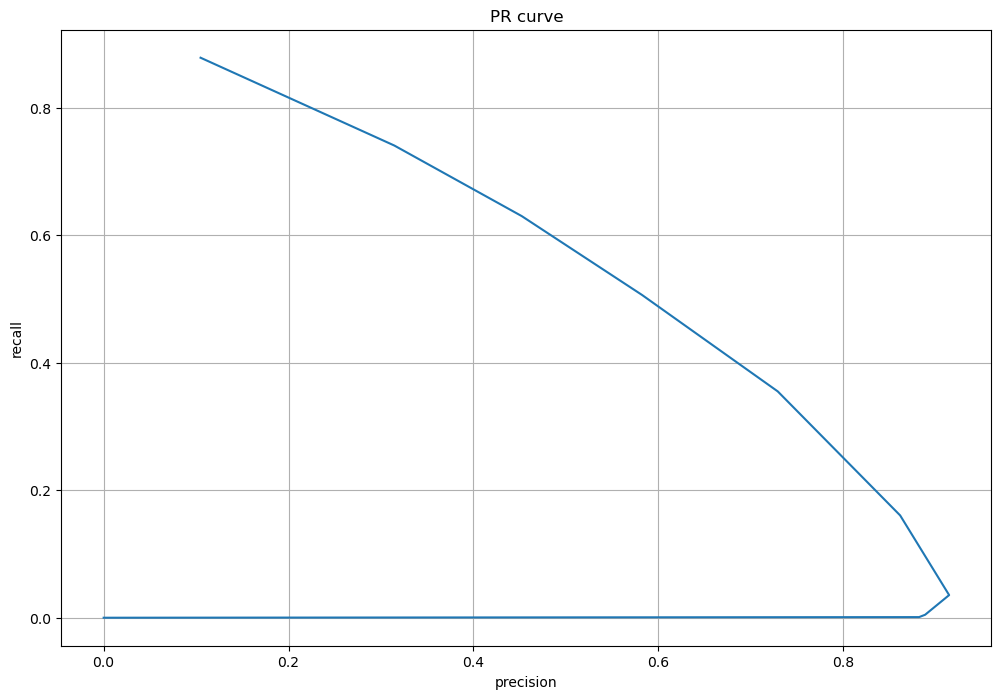

In [4]:
evaluate(ct, pred_path=pred_path)

Посмотрим на ошибки, допускаемые моделью: